# Esercizio 03.1
L'esercizio richiede di calcolare i payoff call e cut con metodi Monte-Carlo in due diversi campionamenti: diretto e discretizzato.

## Descrizione teorica
L'obbiettivo è stimare il prezzo futuro di un asset, in questo caso $T=1$ anno, in un mercato dove i prezzi seguono un processo stocastico detto moto geometrico browniano o GBM. Con un'opzione call sull'asset si ha il diritto di comprare un'azione a un prezzo fisso, lo strike $K$, al tempo $T$. Dunque il payoff sarà $\max(S(T) - K,\ 0)$. Con un'opzione put invece si ha il diritto di vendere l'asset al tempo $T$ a un prezzo fisso, lo strike $K$, pertanto il payoff sarà $\max(K - S(T),\ 0)$. $S(T)$ simula il GBM ed ha la forma: 
$$
S(T) = S(0) \exp\left[\left(r - \frac{1}{2}\sigma^2\right)T + \sigma W(T)\right]
\quad \text{con} \quad W(T) \sim \mathcal{N}(0, T)
$$
Per calcolare il prezzo ad oggi delle due opzioni devo calcolarne il payoff e poi moltiplicarlo per $( e^{-rT} )$ (*attualizzazione*). In pratica si calcola il valore atteso del payoff futuro al tempo $T$ e lo si riporta a oggi attraverso $r$ che è il tasso di interesse privo di rischio, cioè il tasso che si otterrebbe investendo in un'attività completamente sicura.
I parametri della simulazione eseguita sono: 
- prezzo dell'asset a $t=0$: $S(0)=100$
- scadenza: $T=1$
- strike: $K=100$
- tasso di interesse privo di rischio: $r=0.1$
- volatilità: $\sigma=0.25$

## Campionamento diretto e discretizzato
Con un campionamento diretto si calcola direttamente $S$ al tempo $T$ e si calcola il payoff attualizzato con questo valore. Con un campionamento discretizzato invece si divide $[0,T]$ in $10^2$ intervalli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$ cosicché il prezzo evolva iterativamente secondo la formula: 
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$
Si usa poi $S(t_{100}=T=1)$ nel calcolo del payoff attualizzato.

## Opzione call

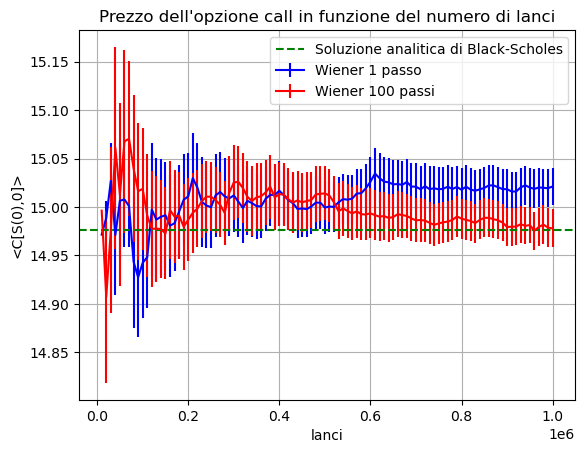

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#carico i dati
x1, f1_0, err1_0, f1_1, err1_1 = np.loadtxt("callprice.txt", delimiter=' ', unpack=True)
#creo il grafico
plt.figure()
#plotto le due opzioni call ottenute con passi=1 e passi=100
plt.errorbar(x1,f1_0,yerr=err1_0, label='Wiener 1 passo', color='blue')
plt.errorbar(x1,f1_1,yerr=err1_1, label='Wiener 100 passi', color='red')
#linea orizzontale con la soluzione analitica di Black-Scholes
plt.axhline(y=14.975790778311286, color='green', linestyle='--', label='Soluzione analitica di Black-Scholes')
plt.xlabel('lanci')
plt.ylabel('<C[S(0),0]>')
plt.title('Prezzo dell\'opzione call in funzione del numero di lanci')
plt.legend()
plt.grid(True)

plt.show()

## Opzione put

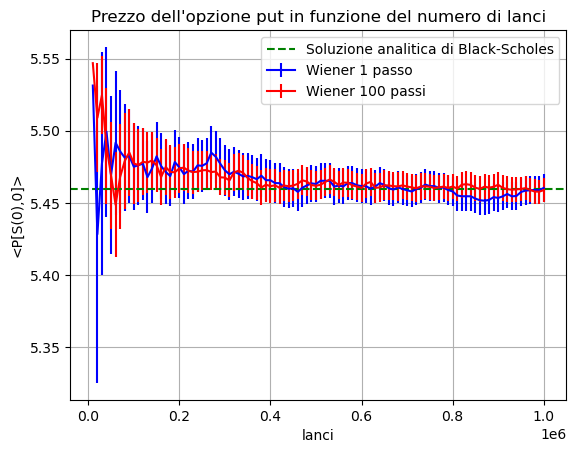

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#stessi procedimenti dello script con i dati di callprice.txt
x2, f2_0, err2_0, f2_1, err2_1 = np.loadtxt("putprice.txt", delimiter=' ', unpack=True)

plt.figure()
plt.errorbar(x2,f2_0,yerr=err2_0, label='Wiener 1 passo', color='blue')
plt.errorbar(x2,f2_1,yerr=err2_1, label='Wiener 100 passi', color='red')
plt.axhline(y=5.4595325819072364, color='green', linestyle='--', label='Soluzione analitica di Black-Scholes')
plt.xlabel('lanci')
plt.ylabel('<P[S(0),0]>')
plt.title('Prezzo dell\'opzione put in funzione del numero di lanci')
plt.legend()
plt.grid(True)

plt.show()

## Conclusione e confronto dei campionamenti
Si noti come dopo iniziali fluttuazioni, ad un certo numero di simulazioni il valore del payoff futuro si stabilizza intorno al valore vero della soluzione analitica di Black-Scholes confermando l'efficacia dei metodi Monte-Carlo nella valutazione di asset futuri. Il campionamento diretto è più efficiente computazionalmente e produce una stima con varianza inferiore, poiché utilizza la distribuzione esatta del prezzo finale dell’asset. Il campionamento discretizzato in qualche modo stima il percorso del valore dell'asset ed è pertanto soggetto a maggior varianza e a maggiori costi computazionali. Entrambi convergono verso il valore vero della soluzione di Black-Scholes, tuttavia per opzioni di questo tipo è più conveniente usare il campionamento diretto. Se invece il modello impone di tener conto di un'evoluzione temporale irregolare allora conviene utilizzare il campionamento discretizzato con $\Delta t$ non uniformi.